## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:秦瑞宏


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：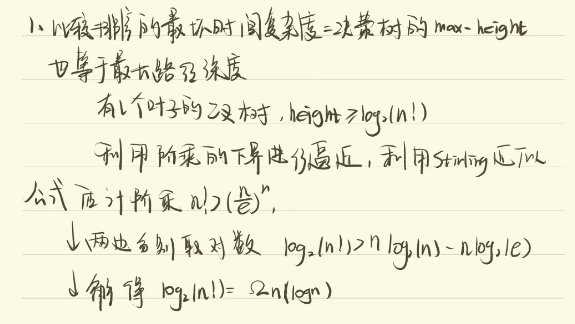

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：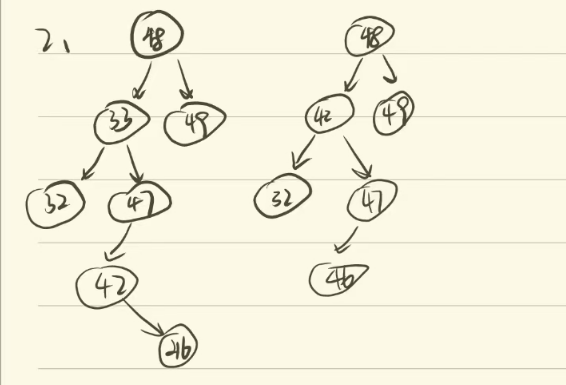

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：
将 "HH:MM" 格式的时间转换为分钟数，方便后续比较。
所有课程时间段按开始时间升序排列，这是贪心调度的前提。
3. 使用最小堆/列表记录当前教室的最早结束时间
heap 存储当前每个教室的课程结束时间和教室编号 (end_time, room_id)。
每来一门新课，就检查是否可以放入某个当前空闲的教室（即课程开始时间 ≥ 教室当前结束时间）。

In [ ]:
code：def question3():
    def time_to_min(t):
        h, m = map(int, t.split(":"))
        return h * 60 + m

    courses = [("9:00","12:30"), ("11:00","14:00"), ("13:00", "14:30"),
               ("9:00","10:30"), ("13:00", "14:30"), ("14:00","16:30"),
               ("15:00","16:30"), ("15:00","16:30"), ("9:00","10:30")]

    intervals = sorted([(time_to_min(start), time_to_min(end)) for start, end in courses])
    heap = []
    room_count = 0
    room_alloc = defaultdict(list)

    for start, end in intervals:
        assigned = False
        for i in range(len(heap)):
            if start >= heap[i][0]:
                end_time, room_id = heap.pop(i)
                heapq.heappush(heap, (end, room_id))
                room_alloc[room_id].append((start, end))
                assigned = True
                break
        if not assigned:
            room_id = room_count
            room_count += 1
            heapq.heappush(heap, (end, room_id))
            room_alloc[room_id].append((start, end))

    print(f"最少需要 {room_count} 间教室")
    for room in sorted(room_alloc.keys()):
        print(f"教室 {room+1} 安排课程：")
        for start, end in room_alloc[room]:
            print(f"  {start//60}:{start%60:02d} - {end//60}:{end%60:02d}")

## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：这个算法计算的是一个类斐波那契数列

In [ ]:
# add your code here
def question4(n):
    arr = [0]*n
    if  n<=1:
        return 1
    else:
        arr[0] = 0
        arr[1] = 1
        arr[2] = 2
        i=3
        for i in range(3,n):
            arr[i] = arr[i-1] + arr[i-2]

    print(arr)
# your algorithm time complexity is: 
    #时间复杂度是O(N)

## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：
 #n 是物品数量 W 是背包的最大承重
    #每一个状态 dp[i][w] 只依赖于前一行

In [ ]:
# add your code here
def question5():

    weights_values = [(5, 10), (4, 40), (6, 30), (3, 50)]
    max_weight = 9
    n = len(weights_values)
    dp = [[0] * (max_weight + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        w, v = weights_values[i - 1]
        for capacity in range(max_weight + 1):
            if capacity >= w:
                dp[i][capacity] = max(dp[i-1][capacity], dp[i-1][capacity - w] + v)
            else:
                dp[i][capacity] = dp[i-1][capacity]

    print(dp[n][max_weight])
# your algorithm time complexity is:
#总状态数 = (n + 1) × (W + 1) = O(nW)

## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：水高等于左边高度和右边高度的最小值减去当前高度

In [ ]:
# add your code here
def question6(height):
    if not height:
        return 0

    n = len(height)
    left_max = [0] * n
    right_max = [0] * n

    left_max[0] = height[0]
    for i in range(1, n):
        left_max[i] = max(left_max[i - 1], height[i])

    right_max[-1] = height[-1]
    for i in range(n - 2, -1, -1):
        right_max[i] = max(right_max[i + 1], height[i])

    total_water = 0
    for i in range(n):
        total_water += max(0, min(left_max[i], right_max[i]) - height[i])

    return total_water
# your algorithm time complexity is:

## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：性价比排序，逐个选择股票，收益累加

In [ ]:
# add your code here
def question7():
    #stocks.sort(key=lambda x: x[1] / x[0], reverse=True)排序操作，时间复杂度是：O(n log n)
    #循环遍历所有股票，时间复杂度是：O(n)
    stocks = [(5000, 500), (3000, 240), (2000, 240)]
    budget = 7000
    stocks.sort(key=lambda x: x[1] / x[0], reverse=True)  # [(投资, 收益)]

    total_return = 0
    investment_details = []

    for cost, profit in stocks:
        if budget >= cost:
            budget -= cost
            total_return += profit
            investment_details.append((cost, profit))
        else:
            fraction = budget / cost
            total_return += profit * fraction
            investment_details.append((budget, profit * fraction))
            break

    return total_return, investment_details
# your algorithm time complexity is:#算法总的时间复杂度为O(nlogn)

## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

idea：
中序遍历 BST 应该得到一个递增序列。如果两个节点被交换，中序遍历中会出现 降序对（即前一个节点大于当前节点）。
构建树（build_tree）与层序输出（level_order_with_nulls）是辅助函数，用于测试用例输入和结果展示。

In [ ]:
# add your code here

def question8():
    class TreeNode:
        def __init__(self, val=0, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right

    class Solution:
        def recoverTree(self, root: TreeNode) -> None:
            self.first = self.second = self.prev = None

            def inorder(node):
                if not node:
                    return
                inorder(node.left)
                if self.prev and self.prev.val > node.val:
                    if not self.first:
                        self.first = self.prev
                    self.second = node
                self.prev = node
                inorder(node.right)

            inorder(root)
            if self.first and self.second:
                self.first.val, self.second.val = self.second.val, self.first.val

    def build_tree(data):
        """ 从列表构建二叉树，输入格式：[1,3,null,null,2] """
        if not data:
            return None
        root = TreeNode(data[0])
        queue = deque([root])
        i = 1
        while queue and i < len(data):
            node = queue.popleft()
            if i < len(data):
                if data[i] is not None:
                    node.left = TreeNode(data[i])
                    queue.append(node.left)
                i += 1
            if i < len(data):
                if data[i] is not None:
                    node.right = TreeNode(data[i])
                    queue.append(node.right)
                i += 1
        return root

    def level_order_with_nulls(root):
        """ 层序遍历，输出列表（保留 null） """
        if not root:
            return []
        result = []
        queue = deque([root])
        while queue:
            node = queue.popleft()
            if node:
                result.append(node.val)
                queue.append(node.left)
                queue.append(node.right)
            else:
                result.append(None)

        # 去除尾部多余的 None
        while result and result[-1] is None:
            result.pop()
        return result

    root = build_tree([1, 3, None, None, 2])
    print("恢复前层序：", level_order_with_nulls(root))  # 输出：[1,3,None,None,2]

    Solution().recoverTree(root)

    print("恢复后层序：", level_order_with_nulls(root))  # 输出：[3,1,None,None,2]

# your algorithm time complexity is:#时间复杂度： O(n)，其中 n 是树中节点数。中序遍历一次找出错误节点。

## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：
沿着从根到叶子的路径，把每个节点的值拼接成一个整数，递归深度优先遍历（DFS）根节点调用

In [ ]:
# add your code here
def question9():

    class TreeNode:
        def __init__(self, val=0, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right

    class Solution:
        def sumNumbers(self, root: TreeNode) -> int:
            def dfs(node, current_number):
                if not node:
                    return 0
                current_number = current_number * 10 + node.val
                if not node.left and not node.right:
                    return current_number
                return dfs(node.left, current_number) + dfs(node.right, current_number)

            return dfs(root, 0)

    def build_tree(data):

        if not data:
            return None
        root = TreeNode(data[0])
        queue = deque([root])
        i = 1
        while i < len(data):
            node = queue.popleft()
            if i < len(data) and data[i] is not None:
                node.left = TreeNode(data[i])
                queue.append(node.left)
            i += 1
            if i < len(data) and data[i] is not None:
                node.right = TreeNode(data[i])
                queue.append(node.right)
            i += 1
        return root

    root = build_tree([1, 2, 3])
    print("路径数字之和：", Solution().sumNumbers(root))

# your algorithm time complexity is:
    #时间复杂度： O(n)，其中 n 是节点总数。每个节点只遍历一次。

## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea
一棵二叉树是对称的，当它的左子树和右子树在结构和数值上互为镜像。判断两个子树 t1 和 t2 是否互为镜像

In [ ]:
# add your code here

def question10():
    class TreeNode:
        def __init__(self, val=0, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right

    class Solution:
        def isSymmetric(self, root: TreeNode) -> bool:
            def isMirror(t1, t2):
                if not t1 and not t2:
                    return True
                if not t1 or not t2:
                    return False
                return (t1.val == t2.val and
                        isMirror(t1.left, t2.right) and
                        isMirror(t1.right, t2.left))

            return isMirror(root.left, root.right) if root else True

    def build_tree(data):
        """从层序列表构建二叉树"""
        if not data:
            return None
        root = TreeNode(data[0])
        queue = deque([root])
        i = 1
        while i < len(data):
            node = queue.popleft()
            if i < len(data) and data[i] is not None:
                node.left = TreeNode(data[i])
                queue.append(node.left)
            i += 1
            if i < len(data) and data[i] is not None:
                node.right = TreeNode(data[i])
                queue.append(node.right)
            i += 1
        return root

    root = build_tree([1, 2, 2, 3, 4, 4, 3])
    sol = Solution()
    print(sol.isSymmetric(root))  # 输出: True

# your algorithm time complexity is:O(n)

## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:深度优先搜索（DFS）算法来遍历二维网格。算法从网格中的每个单元格开始，如果遇到值为 '1' 的单元格（表示陆地），则进行深度优先搜索，将与该单元格连通的所有 '1' 单元格都标记为已访问（例如，将其值改为 '0'）

In [ ]:
# add your code here
def question11():
    from typing import List

    class Solution:
        def numIslands(self, grid: List[List[str]]) -> int:
            if not grid:
                return 0

            rows, cols = len(grid), len(grid[0])
            count = 0

            def dfs(r, c):
                if r < 0 or c < 0 or r >= rows or c >= cols or grid[r][c] == '0':
                    return
                grid[r][c] = '0'  # 标记为已访问
                dfs(r + 1, c)
                dfs(r - 1, c)
                dfs(r, c + 1)
                dfs(r, c - 1)

            for r in range(rows):
                for c in range(cols):
                    if grid[r][c] == '1':
                        count += 1
                        dfs(r, c)

            return count

    grid = [
        ["1", "1", "1", "1", "0"],
        ["1", "1", "0", "1", "0"],
        ["1", "1", "0", "0", "0"],
        ["0", "0", "0", "0", "0"]
    ]
    sol = Solution()
    print(sol.numIslands(grid))  
# your algorithm time complexity is:O(M*N),